All imports.

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pprint
import collections

After selecting the dataset we need to create 2 artificial networks starting from the selected network. 
- The first Sshould be a random network employing an Erdos-Renyi model
- The second should be a scale-free network employing a Barabasi-Albert model

#TODO Add more info about those models.

Firstly the Erdos-Renyi generation

In [ ]:
# THIS CODE IS COMENTED AS IT ONLY NEEDS TO RUN WHEN GENERATING A NEW VERSION OF THE NETWORK OR IF NO NETWORK WAS GENERATED YET
# # Parameters based on socfb-Reed98 dataset
# n = 962               # Number of nodes
# # Using the provided average degree of 39, the approximate number of edges:
# E = int(n * 39 / 2)   # Approximately 18759 edges

# # --- Create Erdős–Rényi Graph ---
# # For an undirected graph, the edge probability p is given by:
# #    p = (2E) / [n * (n - 1)]
# p = (2 * E) / (n * (n - 1))
# print(f"Erdős–Rényi model: n = {n}, E ≈ {E}, p = {p:.5f}")

# G_er = nx.erdos_renyi_graph(n, p)
# print(f"Created Erdős–Rényi graph with {G_er.number_of_nodes()} nodes and {G_er.number_of_edges()} edges.")

# # Save the Erdős–Rényi graph as a Matrix Market (.mtx) file in pattern format (undirected, unweighted)
# er_file = "networks/socfb-Reed98_ER.mtx"
# mmwrite(er_file, nx.to_scipy_sparse_array(G_er), field="pattern", symmetry="symmetric")
# print(f"Erdős–Rényi graph saved to '{er_file}'")

Secondly the Barabasi-Albert generation


In [ ]:
# THIS CODE IS COMENTED AS IT ONLY NEEDS TO RUN WHEN GENERATING A NEW VERSION OF THE NETWORK OR IF NO NETWORK WAS GENERATED YET
# # Parameters based on socfb-Reed98 dataset
# n = 962               # Number of nodes
# # Using the provided average degree of 39, the approximate number of edges:
# E = int(n * 39 / 2)   # Approximately 18759 edges

# # --- Create Barabási–Albert Graph ---
# # In the BA model, each new node attaches to m existing nodes.
# # BA graphs have an average degree ≈ 2*m, so we choose m ≈ 20.
# m = 20
# G_ba = nx.barabasi_albert_graph(n, m)
# print(f"Created Barabási–Albert graph with {G_ba.number_of_nodes()} nodes and {G_ba.number_of_edges()} edges.")

# # Save the Barabási–Albert graph as a Matrix Market (.mtx) file in pattern format (undirected, unweighted)
# ba_file = "networks/socfb-Reed98_BA.mtx"
# mmwrite(ba_file, nx.to_scipy_sparse_array(G_ba), field="pattern", symmetry="symmetric")
# print(f"Barabási–Albert graph saved to '{ba_file}'")

Now to read and initialize the 3 networks for further analysis.

In [4]:
matrix_original = scipy.io.mmread("networks/socfb-Reed98.mtx")
matrix_ba = scipy.io.mmread("networks/socfb-Reed98_BA.mtx")
matrix_er = scipy.io.mmread("networks/socfb-Reed98_ER.mtx")

G_original = nx.from_scipy_sparse_array(matrix_original)
G_BA = nx.from_scipy_sparse_array(matrix_ba)
G_ER = nx.from_scipy_sparse_array(matrix_er)

Now to gather some insights into the description of each of the networks

In [24]:
def describe_network(G, name):
    # Basic statistics
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()

    # Check if graph is directed
    is_directed = G.is_directed()

    # Check if graph is weighted
    is_weighted = any(data.get('weight', 1) != 1 for _, _, data in G.edges(data=True))

    # Density
    density = nx.density(G)

    print(f"\nNetwork Description for {name}:")
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")
    print(f"Directed: {is_directed}")
    print(f"Weighted: {is_weighted}")
    print(f"Network density: {density:.6f}\n")
    

describe_network(G_original, "Original Network")
describe_network(G_BA, "BA Network")
describe_network(G_ER, "ER Network")


Network Description for Original Network:
Number of nodes: 962
Number of edges: 18812
Directed: False
Weighted: False
Network density: 0.040697


Network Description for BA Network:
Number of nodes: 962
Number of edges: 18840
Directed: False
Weighted: False
Network density: 0.040758


Network Description for ER Network:
Number of nodes: 962
Number of edges: 18589
Directed: False
Weighted: False
Network density: 0.040215




1. Original socfb-Reed98 Network
    * Nature of the Network:
        * Undirected & Unweighted: Each edge represents a mutual friendship between two individuals.
        * Social Network: The nodes correspond to people, and the links (edges) represent Facebook friendship relations.
    * Significance and Meaning:
        * Real-World Representation: This network is an authentic representation of social interactions on Facebook, where the structure reflects how individuals are connected within a community.
        * Community Structure & Clustering: Such networks often exhibit strong community structures and high clustering coefficients, indicating that friends of an individual are likely to be friends with each other.
        * Research Value: Analyzing this network helps in understanding social dynamics, influence spread, and network resilience.

2. Erdős–Rényi Synthetic Network (Random Model)
    * Nature of the Network:
        * Randomly Generated: Each pair of nodes is connected with a fixed probability p, independent of other pairs.
        * Statistical Properties: Typically, such networks have a Poisson-like degree distribution when the number of nodes is sufficiently large.
    * Significance and Meaning:
        * Null Model: The Erdős–Rényi model is often used as a baseline to compare with real networks, helping to highlight the impact of structured, non-random connectivity in social systems.
        * Lack of Community Structure: Since edges are added purely at random, there’s generally no inherent clustering or community formation—this contrast can reveal the role of social processes in real networks.
        * Theoretical Insights: It is useful for studying the emergence of connectivity and understanding properties like the threshold for the appearance of a giant component.

3. Barabási–Albert Synthetic Network (Scale-Free Model)
    * Nature of the Network:
        * Scale-Free: The degree distribution follows a power law, meaning that a few nodes (hubs) accumulate a large number of links while most nodes have relatively few connections.
        * Preferential Attachment: New nodes prefer to attach to already well-connected nodes, creating a “rich-get-richer” effect.

    * Significance and Meaning:
        * Modeling Real-World Networks: Many social, biological, and technological networks exhibit scale-free properties. This model helps to replicate and study such phenomena.
        * Emergence of Hubs: The existence of hubs explains why certain individuals or entities become highly influential or central in a network.
        * Robustness & Vulnerability: Scale-free networks are often robust against random failures (since most nodes are not highly connected) but may be vulnerable to targeted attacks on the hubs. This insight is vital for understanding network resilience.


Utility code.

In [47]:
#---TODO: add your functions that you'll use in the notebook repeatedly, if any
  
def degree_summary_and_distribution(G: nx.Graph):
    # Degree of a Node: The number of edges connected to a node.
    # Interpretation: A node's degree represents how many friends a person has on facebook.

    #  - the lowest number of friends
    #  - the highest number of friends
    #  - the average number of friends
    degrees = [d for _, d in G.degree()]
    min_degree = np.min(degrees)
    max_degree = np.max(degrees)
    avg_degree = np.mean(degrees)

    print(f"Min Degree: {min_degree}")
    print(f"Max Degree: {max_degree}")
    print(f"Average Degree: {avg_degree}")

    # count how many times each degree appears
    degree_count = collections.Counter(degrees)
    # sort the info and have separate lists
    degree_values, node_counts = zip(*sorted(degree_count.items()))

    total = sum(node_counts)
    node_counts = [y / total for y in node_counts]

    # plot as a dot graph
    plt.figure(figsize=(7, 5))
    plt.plot(degree_values, node_counts, 'o', color='blue')
    plt.title("Degree Distribution (Dot Plot)")
    plt.xlabel("Degree")
    plt.ylabel("Number of Nodes")
    plt.grid(True)
    plt.show()


def connectivity(G: nx.Graph):
    is_connected = nx.is_connected(G)
    if not is_connected:
        # Connected Component: A group of nodes that are connected by paths.
        # The connected components can indicate if the network is one big cluster or composed of small ones.
        # Interpretation: Groups of friends isolated or interconnected.
        connected_components = list(nx.connected_components(G))
        num_connected_components = len(connected_components)
        largest_component_size = max(len(c) for c in connected_components)
        largest_cc = G.subgraph(max(connected_components, key=len))

    else:
        largest_component_size = len(G)
        largest_cc = G
        num_connected_components = 1

    print(f"The graph is connected: {is_connected}.")
    print(f"Number of Connected Components: {num_connected_components}.")
    print(f"Largest Component Size: {largest_component_size}.")

    # Diameter: the largest distance between any pair of nodes in the network.
    # Interpretation: the longest "friendship chain" connecting two users.
    diameter = nx.diameter(largest_cc) if nx.is_connected(largest_cc) else None
    
    print(f"Diameter: {diameter}")


def clustering_coefficient_and_distribution_plot(G: nx.Graph):
    # Clustering Coefficient: Measures how tightly connected a node’s neighbors are (how likely it is for 2 nodes with a common neighbor to be linked).
    # Interpretation: How interconnected are on average the users. High clustering means high interaction between the friends of an user.
    avg_clustering = nx.average_clustering(G)
    
    print(f"Average Clustering Coefficient: {avg_clustering}")

    # Edge density: fraction of actual edges compared to the maximum possible edges.
    # Used to determine if the clustering coefficient is high or not.
    # NOTE: A low density means the network is sparse.
    edge_density = nx.density(G)

    print(f"Edge Density: {edge_density}")
    print(f"Clustering Coefficient is {"high" if avg_clustering > edge_density else "low"} compared to the edge density.")

    # plot clustering coefficient probability per degree
    degree_per_node = dict(G.degree())
    clustering_per_node = nx.clustering(G)

    # group clustering coefficients by degree
    clustering_by_degree = {}
    for node in G.nodes():
        k = degree_per_node[node]
        c = clustering_per_node[node]
        # if key already exists, make no change, else give a default
        clustering_by_degree.setdefault(k, [])
        clustering_by_degree[k].append(c)

    # compute average clustering coefficient per degree
    sorted_degrees = sorted(clustering_by_degree)
    avg_clustering_values_per_degree = [np.mean(clustering_by_degree[degree]) for degree in sorted_degrees]

    # Plot in log-log scale
    plt.figure(figsize=(6, 5))
    plt.scatter(sorted_degrees, avg_clustering_values_per_degree, color='red')
    plt.xlabel('Degree $k$')
    plt.ylabel('Clustering Coefficient $C(k)$')
    plt.title('Clustering Coefficient vs Degree')
    plt.grid(True)
    plt.show()


def betweenness_centrality_distribution(G: nx.Graph):
    # Betweenness Centrality: measures how often a node appears on shortest paths between other nodes.
    # Interpretation: People with high betweeness are the connection between two separate groups. They transfer information between the groups.
    
    betweenness = list(nx.betweenness_centrality(G).values())

    avg_betweenness = np.mean(betweenness)
    max_betweenness = np.max(betweenness)

    print(f"Average Betweenness Centrality: {avg_betweenness}")
    print(f"Max Betweenness Centrality: {max_betweenness}")

    # Plot distribution
    plt.figure()
    plt.hist(betweenness, bins="auto", edgecolor="black", linewidth=0.2)
    plt.title("Betweenness Centrality Distribution")
    plt.xlabel("Betweenness Centrality")
    plt.ylabel("Frequency")
    # to diminish the big spikes in the plot 
    plt.yscale("log")
    plt.show()


def shortest_path_length_and_plot(largest_cc: nx.Graph):
    # Shortest path: minimum number of edges required to travel from one node to another.
    # Interpretation: The degree of separation between two users measured in friendships. 
    # NOTE: compare with no. nodes? 
    
    avg_shortest_path_length = nx.average_shortest_path_length(largest_cc)

    print(f"Average Shortest Path Length: {avg_shortest_path_length}")

    # compute shortest paths between all node pairs
    lengths = dict(nx.all_pairs_shortest_path_length(largest_cc))

    # flatten distances into a list
    distance_counts = {}
    for source in lengths:
        for target in lengths[source]:
            if source != target:  # exclude self-loops
                d = lengths[source][target]
                distance_counts[d] = distance_counts.get(d, 0) + 1

    # normalize to get probability distribution
    total_pairs = sum(distance_counts.values())
    d_vals = sorted(distance_counts.keys())
    p_vals = [distance_counts[d] / total_pairs for d in d_vals]

    # plot probability distribution
    plt.figure(figsize=(7, 5))
    plt.plot(d_vals, p_vals, marker='o', color='red')
    plt.title("Shortest Path Length Distribution")
    plt.xlabel("Shortest Path Length $d$")
    plt.ylabel("Probability $p_d$")
    plt.axvline(x=np.average(d_vals, weights=p_vals), linestyle='--', color='gray', label='Average ⟨d⟩')
    plt.legend()
    plt.grid(True)
    plt.show()

# First Network - Original

### Network description

### Network Creation

### Network Properties

#### Connectivity

In [21]:
#TODO: move this to creation
matrix = scipy.io.mmread("networks\\socfb-Reed98.mtx")

# convert the matrix to a NetworkX graph
G = nx.from_scipy_sparse_array(matrix)
#---------

connectivity(G)

The graph is connected: True.
Number of Connected Components: 1.
Largest Component Size: 962.
Diameter: 6


#### Degree distribution

Min Degree: 1
Max Degree: 313
Average Degree: 39.11018711018711


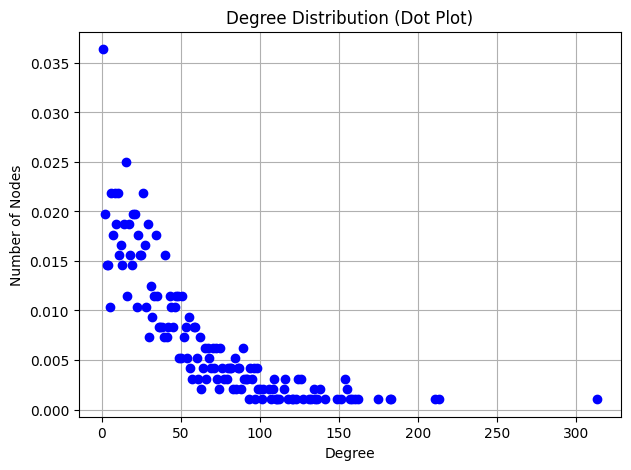

In [48]:
degree_summary_and_distribution(G)

#### Betweeness Centrality Distribution

Average Betweenness Centrality: 0.0015223547709239695
Max Betweenness Centrality: 0.09098269628720329


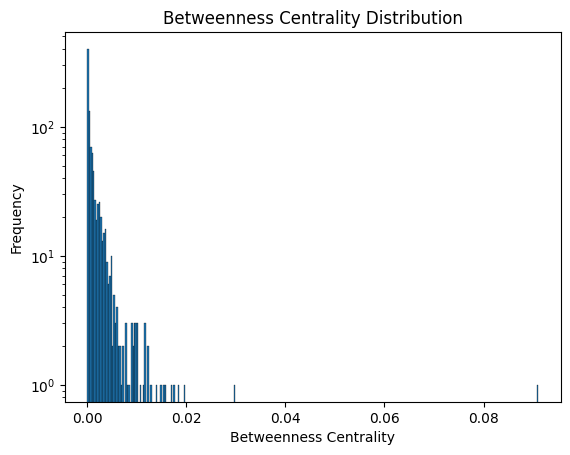

In [49]:
betweenness_centrality_distribution(G)

#### Clustering Coefficient

Average Clustering Coefficient: 0.31836022727227925
Edge Density: 0.04069738513026754
Clustering Coefficient is high compared to the edge density.


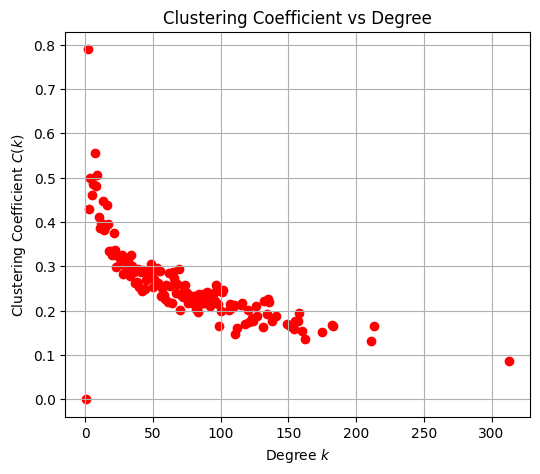

In [50]:
clustering_coefficient_and_distribution_plot(G)

#### Average Shortest Path

Average Shortest Path Length: 2.461460580087011


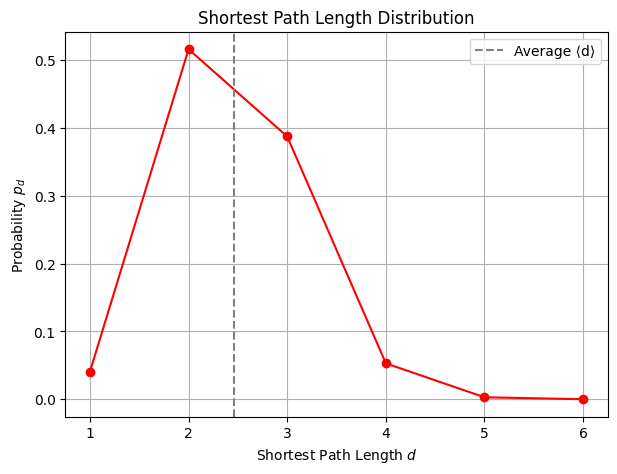

In [51]:
shortest_path_length_and_plot(G)

### Vizualization

### Important Nodes